# Домашнее задание № 2. Мешок слов

## Задание 1 (3 балла)

У векторайзеров в sklearn есть встроенная токенизация на регулярных выражениях. Найдите способо заменить её на кастомную токенизацию

Обучите векторайзер с дефолтной токенизацией и с токенизацией razdel.tokenize. Обучите классификатор (любой) с каждым из векторизаторов. Сравните метрики и выберете победителя.

(в вашей тетрадке должен быть код обучения и все метрики; если вы сдаете в .py файлах то сохраните полученные метрики в отдельном файле или в комментариях)

In [1]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/refs/heads/master/notebooks/bow/labeled.csv.zip

--2024-11-24 18:52:31--  https://github.com/mannefedov/compling_nlp_hse_course/raw/refs/heads/master/notebooks/bow/labeled.csv.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/refs/heads/master/notebooks/bow/labeled.csv.zip [following]
--2024-11-24 18:52:32--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/refs/heads/master/notebooks/bow/labeled.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1463222 (1.4M) [application/zip]
Saving to: ‘labeled.csv.zip’

labeled.csv.zip     100%[===================>]   1.39M  --.-KB/s    in 0.04

In [6]:
!unzip labeled.csv.zip

Archive:  labeled.csv.zip
  inflating: labeled.csv             
  inflating: __MACOSX/._labeled.csv  


In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('labeled.csv')

In [9]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [10]:
!pip install razdel

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
import razdel

X_train, X_test, y_train, y_test = train_test_split(data['comment'], data['toxic'], test_size=0.3, random_state=42)

default_vectorizer = CountVectorizer()
X_train_default = default_vectorizer.fit_transform(X_train)
X_test_default = default_vectorizer.transform(X_test)

razdel_vectorizer = CountVectorizer(tokenizer=(lambda text: [token.text for token in razdel.tokenize(text)]))
X_train_razdel = razdel_vectorizer.fit_transform(X_train)
X_test_razdel = razdel_vectorizer.transform(X_test)

clf_default = MultinomialNB()
clf_default.fit(X_train_default, y_train)
y_pred_default = clf_default.predict(X_test_default)

clf_razdel = MultinomialNB()
clf_razdel.fit(X_train_razdel, y_train)
y_pred_razdel = clf_razdel.predict(X_test_razdel)

metric_default = classification_report(y_test, y_pred_default)

metric_razdel = classification_report(y_test, y_pred_razdel)

print("Метрики для дефолтной токенизации:")
print(metric_default)

print("Метрики для кастомной токенизации (razdel):")
print(metric_razdel)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Метрики для дефолтной токенизации:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      2906
         1.0       0.90      0.63      0.74      1418

    accuracy                           0.86      4324
   macro avg       0.87      0.80      0.82      4324
weighted avg       0.86      0.86      0.85      4324

Метрики для кастомной токенизации (razdel):
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      2906
         1.0       0.90      0.60      0.72      1418

    accuracy                           0.85      4324
   macro avg       0.87      0.78      0.81      4324
weighted avg       0.85      0.85      0.84      4324



## Задание 2 (3 балла)

Обучите 2 любых разных классификатора из семинара. Предскажите токсичность для текстов из тестовой выборки (используйте одну и ту же выборку для обоих классификаторов) и найдите 10 самых токсичных для каждого из классификаторов. Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные?

Требования к моделям:   
а) один классификатор должен использовать CountVectorizer, другой TfidfVectorizer  
б) у векторазера должны быть вручную заданы как минимум 5 параметров (можно ставить разные параметры tfidfvectorizer и countvectorizer)  
в) у классификатора должно быть задано вручную как минимум 2 параметра (по возможности)  
г)  f1 мера каждого из классификаторов должна быть минимум 0.75  

*random_seed не считается за параметр

In [215]:
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
russian_stopwords = set(stopwords.words("russian"))

vectorizer = CountVectorizer(stop_words=list(russian_stopwords), encoding = "utf-8", decode_error = "strict", lowercase = True, ngram_range = (1,1))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
feature_names = np.array(vectorizer.get_feature_names_out())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [258]:
logreg = LogisticRegression(random_state=42, max_iter=1000, C=1.0)
logreg.fit(X_train_vect, y_train)
train_proba = logreg.predict_proba(X_train_vect)[:, 1]
top10_indices = np.argsort(train_proba)[-10:]
top10_texts = X_train.iloc[top10_indices].tolist()
top10_texts

['то что ты сам написал про хохлов\n',
 'Бля пиздец хохлы казахи дегенарты\n',
 'соси как хохлы сосут хохол\n',
 'Хохлы пидоры. У вас тоже хохол под кроватью?\n',
 'Блядь абу нахуй ссылай этих дегенератов в фаг, всем похуй на их шлюх\n',
 'АЛЛО БЛЯДЬ АБУ ТЫ Ч ОХУЕЛ? ВЫГОНЯЙ НАХУЙ СВОЕГО ПОДЗАЛУПНОГО ДРУЖКА ВАРЛАМОВА НАХУЙ ИЗ Б ЭТА ХУЙНЯ ЗАЕБАЛА В 5 ТРЕДОВ БЛЯДЬ НА ГЛАВНОЙ ВИСЕТЬ, БАНЫЙ ТВОЙ РОТ ДЫРЯВЫЙ БЛЯДЬ, ПРОДАЖНАЯ МРАЗЬ!\n',
 'У-ух, ненавижу, блядь, хохлов.\n',
 'Ебать вы тупые дебилы, ой блять\n',
 'Нахуй иди, я тебе весь тред что ли читать буду? Пидор, бешбармак тебе в хычин!\n',
 'Нахуй иди чмо ебаное, рот твой ебал. Говна поешь, быдло\n']

In [259]:
f1_logreg = f1_score(y_test, logreg.predict(X_test_vect), average="weighted")
f1_logreg

0.7893874550484907

In [260]:
vectorizer = TfidfVectorizer(stop_words=list(russian_stopwords))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

nb = MultinomialNB(alpha=0.5, force_alpha=True)
nb.fit(X_train_vect, y_train)
train_proba = nb.predict_proba(X_train_vect)[:, 1]
top10_indices = np.argsort(train_proba)[-10:]

top10_texts = X_train.iloc[top10_indices].tolist()
top10_texts

['Сириусли? Ну мразь ебаная, в край уже охуела и хули вы там сидите-пердите, надо этой шкуре показать, шо ее место под шконкой. Мразь охуевшая, а по ебасосине ее тупорылой не задонатить? Пиздец, как она меня бесит.\n',
 'У-ух, ненавижу, блядь, хохлов.\n',
 'а ты че? самый умный чтоли? хуй соси, губой тряси! даун ты тупорылый, блядь!!!!\n',
 'Перепутали в роддоме негритенка, хохла и русского. Хохол такой заходит в палату и кричит Слава Украине! Негритенок засмеялся, а русский и хохленок обосрались и как давай говном кидаться.\n',
 'Хохлы пидоры. У вас тоже хохол под кроватью?\n',
 'Какие блять передергивания? Ты дебил блять зашел на шок-доску и удивляешься что над тобой издеваются. Тут нет твоих друзей, рачье тупорылое, тут тебя все ненавидят. Как же печет от таких необучаемых ебланов. Ты ковбой, твою жену ебут где-то нахуй, а дети гибнут на Украине. Понял, быдло ты ебаное?\n',
 'АЛЛО БЛЯДЬ АБУ ТЫ Ч ОХУЕЛ? ВЫГОНЯЙ НАХУЙ СВОЕГО ПОДЗАЛУПНОГО ДРУЖКА ВАРЛАМОВА НАХУЙ ИЗ Б ЭТА ХУЙНЯ ЗАЕБАЛА В

In [261]:
f1_nb = f1_score(y_test, nb.predict(X_test_vect), average="weighted")
f1_nb

0.8054736703584496

Можно заметить, что тексты похожие, но имеют отличе в зависиомтси от использования разных векторазеров и моделей. Получаемые разлчия лежат в их матеиматической природе, тк тфидф выделяет самые значимые, а каунтвекторайзер самые частые, схожие процессы наблюдаются и в моделях.

## Задание 3 (4 балла - 1 балл за каждый классификатор)

Для классификаторов Logistic Regression, Decision Trees, Naive Bayes, RandomForest найдите способ извлечь важность признаков для предсказания токсичного класса. Сопоставьте полученные числа со словами (или нграммами) в словаре и найдите топ - 5 "токсичных" слов для каждого из классификаторов.

Важное требование: в топе не должно быть стоп-слов. Для этого вам нужно будет правильным образом настроить векторизацию.
Также как и в предыдущем задании у классификаторов должно быть задано вручную как минимум 2 параметра (по возможности, f1 мера каждого из классификаторов должна быть минимум 0.75

In [223]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import numpy as np
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
russian_stopwords = set(stopwords.words("russian"))

vectorizer = CountVectorizer(stop_words=list(russian_stopwords))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

feature_names = np.array(vectorizer.get_feature_names_out())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [224]:
# 1. Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000, C=1.0)  # Настроенные параметры
logreg.fit(X_train_vect, y_train)
coefficients = logreg.coef_[0]
top5_logreg = feature_names[np.argsort(coefficients)[-5:]]
f1_logreg = f1_score(y_test, logreg.predict(X_test_vect), average="weighted")
print("Топ-5 токсичных слов (Logistic Regression):", top5_logreg)
print("F1-мера Logistic Regression:", f1_logreg)

Топ-5 токсичных слов (Logistic Regression): ['хохол' 'дебил' 'быдло' 'хохлов' 'хохлы']
F1-мера Logistic Regression: 0.8358818509483684


In [245]:
# 2. Decision Tree
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=300,  # Увеличение глубины
    min_samples_split=250,  # Уменьшение минимального количества выборок для разделения
    min_samples_leaf=2, # Увеличение минимального количества образцов в листе
    splitter='random',
)
dt.fit(X_train_vect, y_train)
importances_dt = dt.feature_importances_
top5_dt = feature_names[np.argsort(importances_dt)[-5:]]
f1_dt = f1_score(y_test, dt.predict(X_test_vect), average="weighted")
print("Топ-5 токсичных слов (Decision Tree):", top5_dt)
print("F1-мера Decision Tree:", f1_dt)

Топ-5 токсичных слов (Decision Tree): ['очень' 'нахуй' 'тебе' 'хохлов' 'хохлы']
F1-мера Decision Tree: 0.7541732238138356


In [246]:
# 3. Random Forest
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=300,# Больше деревьев для уменьшения переобучения
    max_features = 300,
    max_depth=300,  # Увеличение максимальной глубины
    min_samples_split=5,  # Более тонкая грануляция сплитов
    min_samples_leaf=2  # Увеличение минимального количества образцов в листьях
)
rf.fit(X_train_vect, y_train)
importances_rf = rf.feature_importances_
top5_rf = feature_names[np.argsort(importances_rf)[-5:]]
f1_rf = f1_score(y_test, rf.predict(X_test_vect), average="weighted")
print("Топ-5 токсичных слов (Random Forest):", top5_rf)
print("F1-мера Random Forest:", f1_rf)

Топ-5 токсичных слов (Random Forest): ['нахуй' 'тебе' 'очень' 'хохлов' 'хохлы']
F1-мера Random Forest: 0.7680925830809464


In [228]:
# 4. Naive Bayes
nb = MultinomialNB(alpha=1.0)  # Настроенный параметр
nb.fit(X_train_vect, y_train)
log_prob_nb = nb.feature_log_prob_[1]  # Логарифмическая вероятность для токсичного класса
top5_nb = feature_names[np.argsort(log_prob_nb)[-5:]]
f1_nb = f1_score(y_test,  nb.predict(X_test_vect), average="weighted")
print("Топ-5 токсичных слов (Naive Bayes):", top5_nb)
print("F1-мера Naive Bayes:", f1_nb)

Топ-5 токсичных слов (Naive Bayes): ['ещё' 'вообще' 'тебе' 'просто' 'это']
F1-мера Naive Bayes: 0.8584696307201762


In [262]:
print("Топ-5 токсичных слов (Logistic Regression):", top5_logreg)
print("F1-мера Logistic Regression:", f1_logreg)
print()
print("Топ-5 токсичных слов (Decision Tree):", top5_dt)
print("F1-мера Decision Tree:", f1_dt)
print()
print("Топ-5 токсичных слов (Random Forest):", top5_rf)
print("F1-мера Random Forest:", f1_rf)
print()
print("Топ-5 токсичных слов (Naive Bayes):", top5_nb)
print("F1-мера Naive Bayes:", f1_nb)

Топ-5 токсичных слов (Logistic Regression): ['хохол' 'дебил' 'быдло' 'хохлов' 'хохлы']
F1-мера Logistic Regression: 0.7893874550484907

Топ-5 токсичных слов (Decision Tree): ['очень' 'нахуй' 'тебе' 'хохлов' 'хохлы']
F1-мера Decision Tree: 0.7541732238138356

Топ-5 токсичных слов (Random Forest): ['нахуй' 'тебе' 'очень' 'хохлов' 'хохлы']
F1-мера Random Forest: 0.7680925830809464

Топ-5 токсичных слов (Naive Bayes): ['ещё' 'вообще' 'тебе' 'просто' 'это']
F1-мера Naive Bayes: 0.8054736703584496


Мемасик за просрочку до 2ч

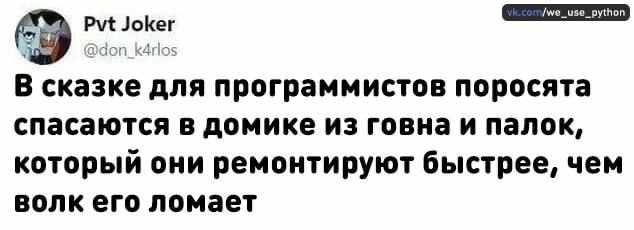